In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

#multivariate imputation
from sklearn.impute import KNNImputer

In [67]:
# list with numerical varables

cols_to_use = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
    'WoodDeckSF',  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
    'SalePrice'
]


In [68]:
# let's load the dataset with a selected variables

data = pd.read_csv('train.csv', usecols=cols_to_use)

# find variable with misssing data;
for var in data.columns:
    if data[var].isnull().sum() > 1:
        print(var,data[var].isnull().sum())

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


In [69]:
# let's separate into training and testing set

# first drop the target from the feature list
#cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['SalePrice'],axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [70]:
# reset index, so we can compare values later on
# in the demo

X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)

#### KNN imputation

In [71]:
imputer = KNNImputer(
                     n_neighbors=5,
                    weights='distance',
                    metric='nan_euclidean',
    add_indicator=False
)

In [72]:
imputer.fit(X_train)

KNNImputer(weights='distance')

In [73]:
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# sklearn returns a Numpy array
# lets make a dataframe
train_t = pd.DataFrame(train_t, columns=X_train.columns)
test_t = pd.DataFrame(test_t, columns=X_test.columns)

train_t.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,70.115142,9375.0,7.0,5.0,1997.0,1998.0,573.0,739.0,0.0,...,645.0,576.0,36.0,0.0,0.0,0.0,0.0,0.0,2.0,2009.0
1,120.0,42.533053,2887.0,6.0,5.0,1996.0,1997.0,0.0,1003.0,0.0,...,431.0,307.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2008.0
2,20.0,50.000000,7207.0,5.0,7.0,1958.0,2008.0,0.0,696.0,0.0,...,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
3,50.0,60.000000,9060.0,6.0,5.0,1939.0,1950.0,0.0,204.0,0.0,...,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2009.0
4,30.0,60.000000,8400.0,2.0,5.0,1920.0,1950.0,0.0,290.0,0.0,...,246.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2009.0


In [74]:
# variables without NA after the imputation

train_t[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().sum()



LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [75]:
# the obseravtions with NA in the original train set

X_train[X_train['MasVnrArea'].isnull()]['MasVnrArea']


420   NaN
490   NaN
642   NaN
824   NaN
921   NaN
Name: MasVnrArea, dtype: float64

In [76]:
# the replacement values in the transformed dataset
train_t[X_train['MasVnrArea'].isnull()]['MasVnrArea']

420     99.765717
490     34.106592
642      0.000000
824    375.749332
921     85.817715
Name: MasVnrArea, dtype: float64

In [77]:
X_train['MasVnrArea'].mean()

103.55358898721731

#### the imputation values are very different from the mean value we would have used in MeanMedianImputation.

In [78]:
from feature_engine.wrappers import SklearnTransformerWrapper


In [82]:
# start the KNNimputer inside the SKlearnTransformerWrapper

imputer = SklearnTransformerWrapper(
    transformer = KNNImputer(weights='distance'),
    variables = cols_to_use,
)


### Multivariate Imputer Chained Equations

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [92]:
# load data with numerical variables

variables = ['A2','A3','A8', 'A11', 'A14', 'A15', 'class']

data = pd.read_csv('credit-approval_csv.csv',usecols=variables)

data.head()

,A2,A3,A8,A11,A14,A15,class
0,30.83,0.000,1.25,1,202.0,0,+
1,58.67,4.460,3.04,6,43.0,560,+
2,24.50,0.500,1.50,0,280.0,824,+
3,27.83,1.540,3.75,5,100.0,3,+
4,20.17,5.625,1.71,0,120.0,0,+


In [94]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('class', axis=1), data['class'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 6), (207, 6))

In [95]:
# find the percentage of missing data within those variables
X_train.isnull().mean()

A2     0.022774
A3     0.000000
A8     0.000000
A11    0.000000
A14    0.014493
A15    0.000000
dtype: float64

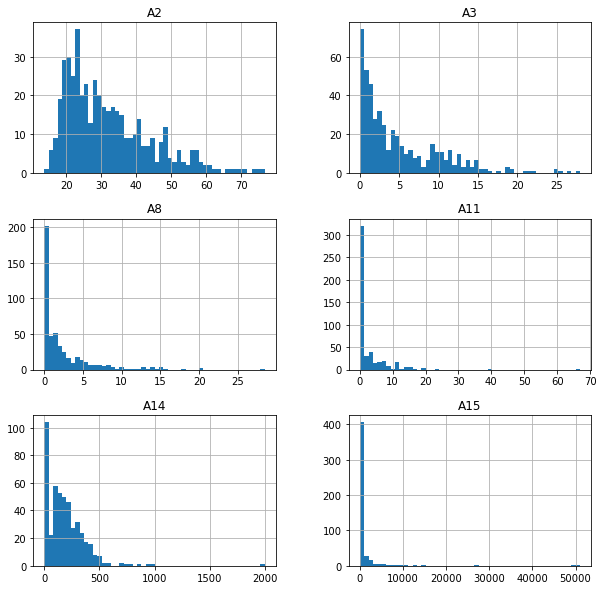

In [97]:
X_train.hist(bins=50,figsize=(10,10))
plt.show()

In [98]:
# MICE imputer using Bayes as estimator

imputer = IterativeImputer(
    estimator=BayesianRidge(), # the estimator to predict the NA
    initial_strategy='mean', # how will NA be imputed in step 1
    max_iter=10, # number of cycles
    imputation_order='ascending', # the order in which to impute the variables
    n_nearest_features=None, # whether to limit the number of predictors
    skip_complete=True, # whether to ignore variables without NA
    random_state=0,
)


imputer.fit(X_train)

In [102]:
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

In [103]:
# after the imputation there is no more data missing

pd.DataFrame(train_t, columns=X_train.columns).isnull().sum()


A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
dtype: int64

#### Lets compare imputation with different models

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor


In [105]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('class', axis=1), data['class'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 6), (207, 6))

In [106]:
imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=0)

imputer_knn = IterativeImputer(
    estimator=KNeighborsRegressor(n_neighbors=5),
    max_iter=10,
    random_state=0)

imputer_nonLin = IterativeImputer(
    estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0),
    max_iter=500,
    random_state=0)

imputer_missForest = IterativeImputer(
    estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
    max_iter=100,
    random_state=0)

In [110]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)

/home/zahoor/.local/lib/python3.10/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt',
                                                 random_state=0),
                 max_iter=500, random_state=0)

In [111]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

/home/zahoor/.local/lib/python3.10/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
                 max_iter=100, random_state=0)

In [112]:

X_train_bayes = imputer_bayes.transform(X_train)
X_train_knn = imputer_knn.transform(X_train)
X_train_nonLin = imputer_nonLin.transform(X_train)
X_train_missForest = imputer_missForest.transform(X_train)


In [113]:
predictors = [var for var in variables if var !='class']


In [114]:
# transform numpy array to dataframe
X_train_bayes = pd.DataFrame(X_train_bayes, columns = predictors)
X_train_knn = pd.DataFrame(X_train_knn, columns = predictors)
X_train_nonLin = pd.DataFrame(X_train_nonLin, columns = predictors)
X_train_missForest = pd.DataFrame(X_train_missForest, columns = predictors)


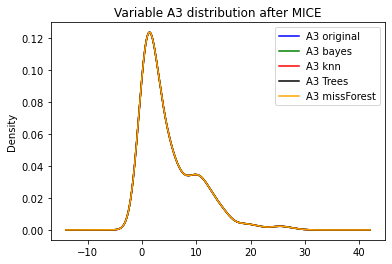

In [115]:


# plot the distribution of the imputed variable

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['A3'].plot(kind='kde', ax=ax, color='blue')
X_train_bayes['A3'].plot(kind='kde', ax=ax, color='green')
X_train_knn['A3'].plot(kind='kde', ax=ax, color='red')
X_train_nonLin['A3'].plot(kind='kde', ax=ax, color='black')
X_train_missForest['A3'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels = ['A3 original', 'A3 bayes', 'A3 knn', 'A3 Trees', 'A3 missForest']
ax.legend(lines, labels, loc='best')
plt.title('Variable A3 distribution after MICE')
plt.show()

